# THE SPARKS FOUNDATION INTERNSHIP

# Author: Pallavi Anil Sindkar

## Task 3 : Prediction using Decision Tree Algorithm

In [1]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
 
#Import the needed matplotlib functionality for scatter plot visualization.P

import matplotlib.pyplot as plt

#Import the needed dataset.

from sklearn.datasets import load_iris

#Import the model and an additional visualization tool.

from sklearn.tree import DecisionTreeClassifier , plot_tree

**Once imports are complete, we may define a few parameters for later use**


In [2]:
#Define a variable to establish 3 classes/species
class_count = 3

#Define standard RGB color scheme for visualizing ternary classification in order to match the color map used later.
plot_colors = "brg"

#Define marker options for plotting class assignments of training data.
markers = "ovs"

#We also need to establish a resolution for plotting. I favor clean powers of ten, but this is not by any means a hard and fast rule.
plot_res = 0.01

**Now load the data set**


In [3]:
#Load the iris dataset
iris = load_iris()

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

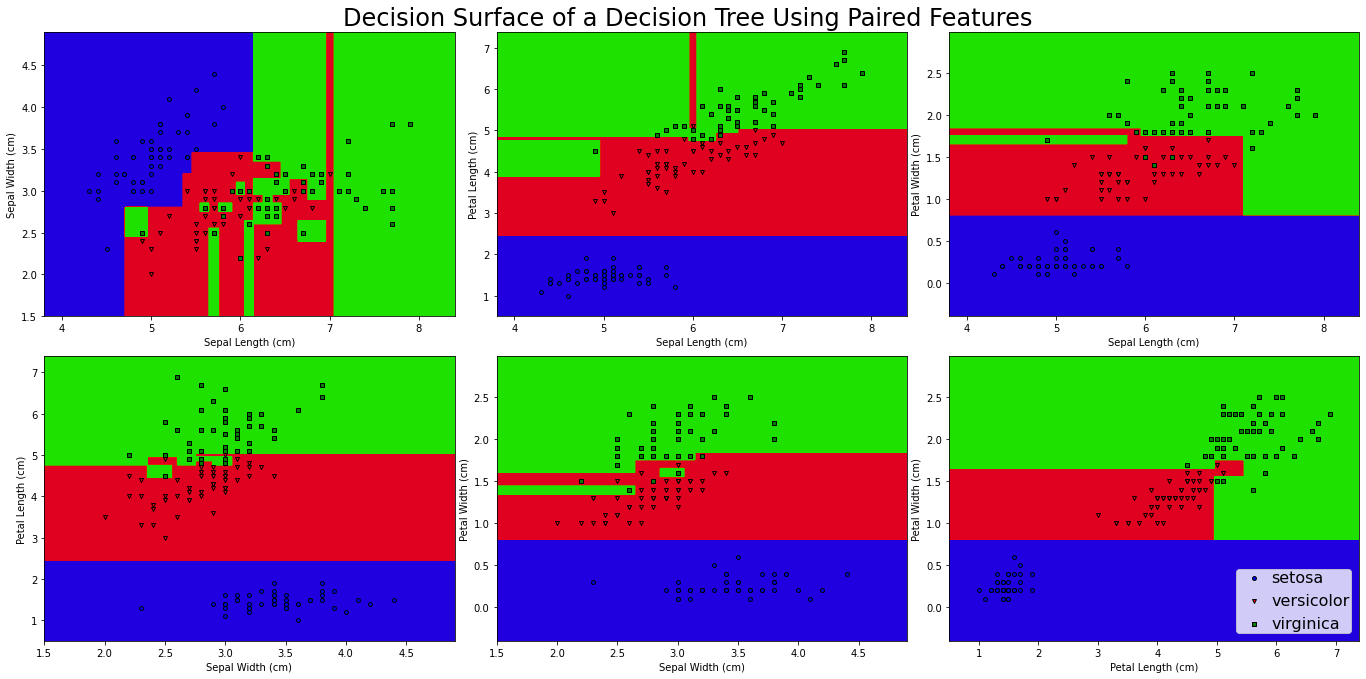

In [8]:
#Set the size of the figure used to contain the subplots to be generated.
plt.figure(figsize=(20,10))

#Create an empty list of models to store the results of each pairwise model fit.
models = []
 
#Use enumerate() to define the possible pairs of features available and iterate over each pair.
for pair_index , pair in enumerate([[0,1],[0,2],[0,3],
                                              [1,2], [1,3], 
                                                [2,3]]):
    X,y = iris.data[:,pair], iris.target
    model = DecisionTreeClassifier().fit(X,y)
    models.append(model)
    
    #Establish a two row by three column subplot array for plotting.
    plt.subplot(2,3,pair_index+1)
    
    #Define appropriate x and y ranges for each plot
    x_min , x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    #Use each range to define a meshgrid to use as the plotting area.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_res),np.arange(y_min, y_max, plot_res) )
    
    # Use plt.tight_layout() to establish spacing of the subplots.
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 4.0 )
    
    # Predict the classification of each point in the meshgrid based on the calculated model above.
    # The numpy methods .c_() and .ravel() reshape our meshgrid values into a format compatible with our model.predict() method,
    Z = model.predict(np.c_[xx.ravel(),  yy.ravel()])
    
    # Reshape the predictions to match xx...
    Z = Z.reshape(xx.shape)
    
    # ... and prepare a contour plot that reflects the predictions .
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    # Define the subplot axis labels after title casing while preserving case on the unit of measure 
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    
    # Plot the training points for each species in turn
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        # Subset the data to the class in question with the np.where() method
        index = np.where(y == i)
        
        # Plot the class in question on the subplot
        plt.scatter(X[index, 0],X[index, 1],c = color, marker = marker,label = iris.target_names[i],cmap = plt.cm.brg,edgecolor = 'black',s = 15)

# Define a title for the overall collection of subplots after each subplot is fully defined
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',size = 24)

# Define the legend for the subplot collection
plt.legend(loc = 'lower right',fontsize = 16,borderpad = 0.1,handletextpad = 0.1 )

# Set limits just large enough to show everything cleanly
plt.axis("tight")


    
    
    
     


**The very short and simple code below shows the results of a decision tree model when all four parameters are considered via the plot_tree() function. As it turns out, only two parameters, petal length (X[2]) and petal width (X[3]), are needed to provide a very high degree of accuracy, yielding results very similar to what is achieved when considering only two parameters. The X[1] parameter for sepal width is also brought to bear to make the finest distinctions, but ultimately doesn't bring much value.**

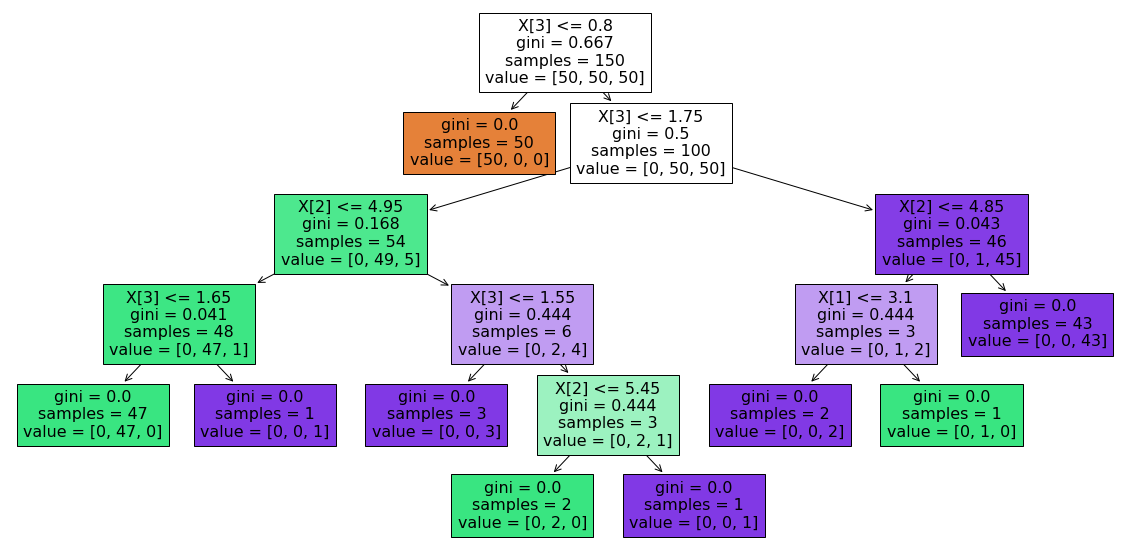

In [9]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)

# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))

# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params,filled=True)

# Display the tree plot figure.
plt.show()


**We may very simply add the max_depth parameter to the model with a value of 3 and observe the effect of forcing some simplicity on the tree, akin to pruning all the smallest branches of a tree down to a few points of divergence closest to the trunk.**



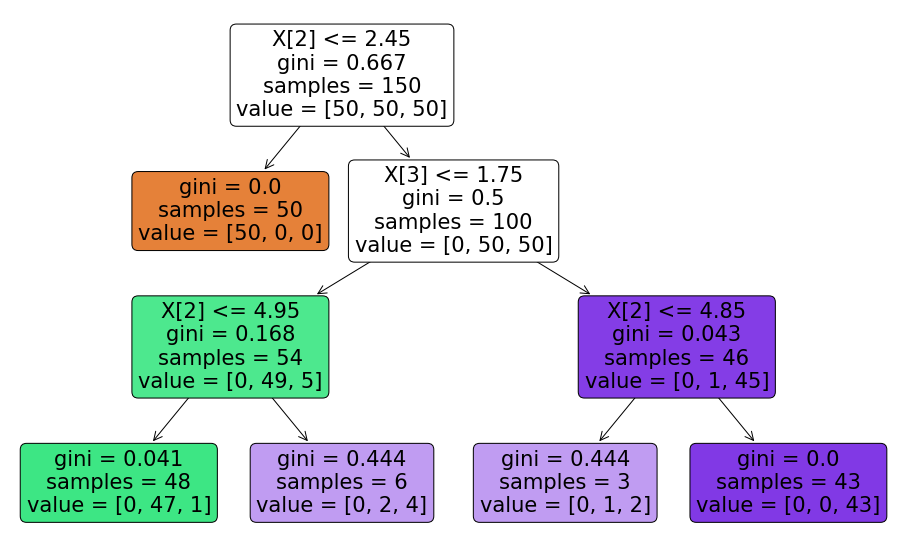

In [10]:
# Apply the decision tree classifier model to the data using all four parameters at once, but with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)

# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))

# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,rounded = True,filled = True)

# Display the tree plot figure.
plt.show()


**This leaves (no pun intended) us with only four misclassified points by applying a total of four tests, and trimming one level sooner, i.e., setting max_depth to 2, would only have six errors out of the 150 points.
Another approach we might consider is to mandate that there must be a significant increase in impurity for the split to occur. Setting the min_impurity_decrease parameter will allow us to restrict splits to those that significantly improve the results of the overal model behavior.**

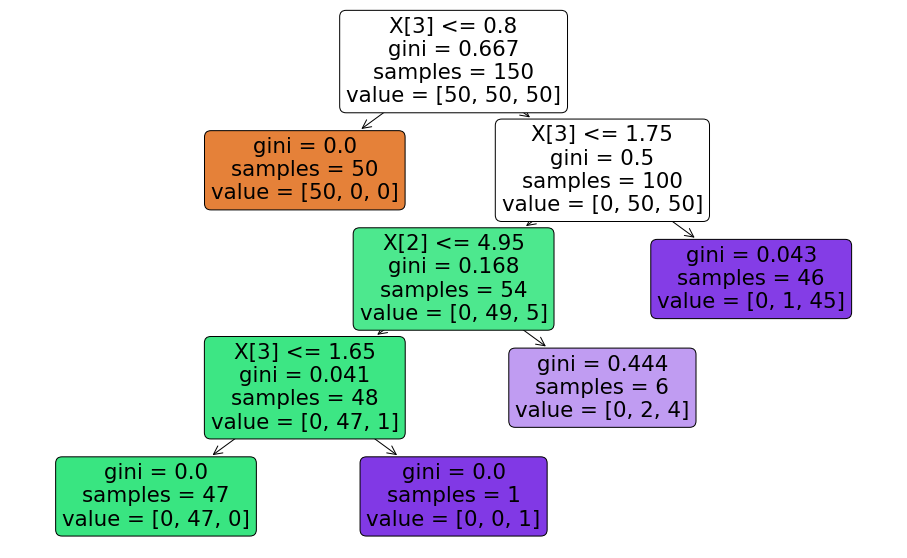

In [11]:
# Apply the model to the data as before, but with a minimum impurity decrease of 0.01
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(iris.data, iris.target)

# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))

# Plot the decision tree.
plot_tree(model_all_params_min_imp_dec_001,rounded = True,filled = True)

# Display the tree plot figure.
plt.show()


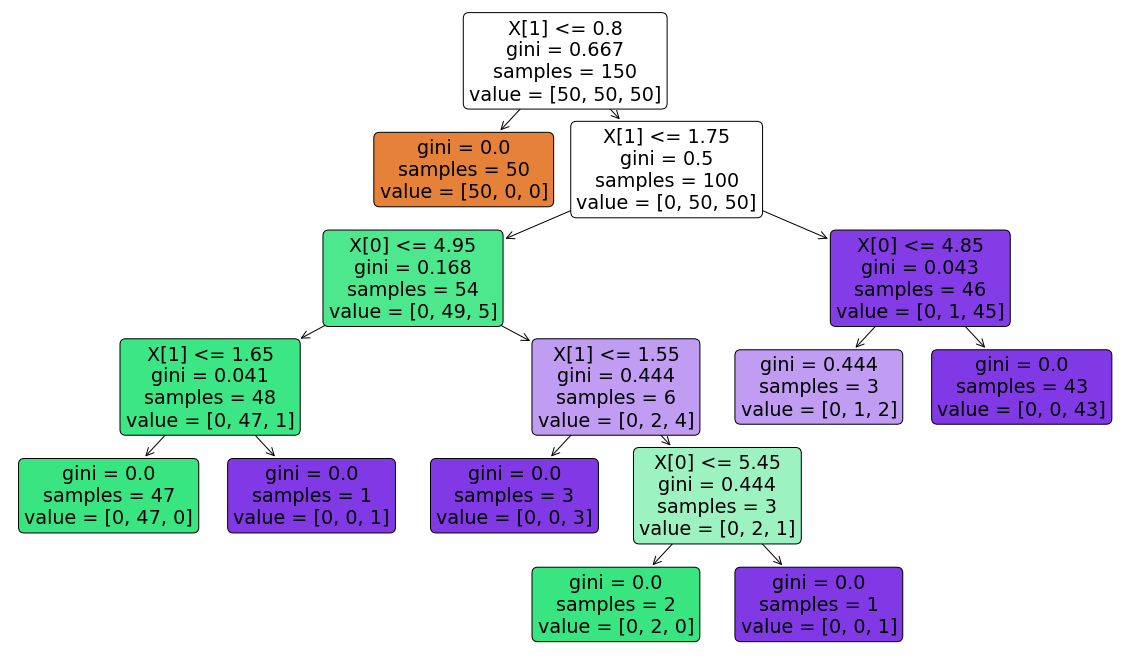

In [12]:
# Prepare a plot figure with set size.
plt.figure(figsize = (20,12))

# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(models[5],rounded = True,filled = True)

# Display the tree plot figure.
plt.show()


## Conclusion:


**Thus, I Created the Decision Tree classifier of Iris Data set and visualize it graphically.**

# Thank You!